# Visualize Artists-Followers Relationship

For each artist we scraped 50,000 followers, and exported the follower information in CSV files individually. The artists are split into two groups, famed and underrated.

In [1]:
# import libraries

library(tidyverse)
library(rtweet)
library(reshape2)
library(dplyr)
library(igraph)

Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 4.1.2"
Warning message:
"package 'tidyr' was built under R version 4.1.2"
Warning message:
"package 'readr' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'rtweet' was built under R version 4.1.3"

Attaching package: 'rtweet'


The following object is masked from 'package:purrr':

    flatten


Warning message:
"package 'reshape2' was built under R version 4.1.1"

Attaching package: 'res

In [4]:
# The CSV are stroed under two different folders regarding their group

# List all CSV in the famed group
famed <- list.files(path="followers_data/famous", pattern="*.csv", full.names=TRUE, recursive=FALSE)

# List all CSV in the underrated group
underrated <- list.files(path="followers_data/underrated", pattern="*.csv", full.names=TRUE, recursive=FALSE)

In [5]:
# Check the integrity
length(famed)
length(underrated)

[1] 20

[1] 20

In [6]:
# A 'for loop' that read CSVs from specific folder and randomly sample 10000 rows for each file
# Returns a list of sampled dataframes

sampled_famed<- lapply(famed, function(x) {
    
    df <- read.csv(x, row.names = 1, header = TRUE) # load file
    
    name = x %>% substring(23,) %>% strsplit('_')
    
    artist_name = rep(name[[1]][1], each = 100)

    DATASET <- data.frame(artist_name, df[sample(nrow(df), 100), ], stringsAsFactors = TRUE)
    
    return(DATASET)
})

In [18]:
# combine list of dataframes to one, rename the column

sampled_famed1 <- bind_rows(sampled_famed)
names(sampled_famed1)[2] <- 'follower_id'

In [25]:
sampled_famed1_matrix <- sampled_famed1 %>%
  mutate(yesno = 1) %>%
  distinct %>%
  spread(artist_name, yesno, fill = 0)

In [37]:
rownames(sampled_famed1_matrix) <- sampled_famed1_matrix$follower_id
sampled_famed1_matrix <- sampled_famed1_matrix[-c(1)]

In [38]:
sampled_famed1_matrix <- as.matrix(sampled_famed1_matrix)
sampled_famed1_matrix_T <- t(sampled_famed1_matrix)

In [40]:
Famed_common_follower1 <- sampled_famed1_matrix_T %*% sampled_famed1_matrix

In [54]:
Famed_common_singers <- sampled_famed1_matrix %*% sampled_famed1_matrix_T
diag(Famed_common_singers) <- 0

In [47]:
Famed_common_follower1[Famed_common_follower1 >= 10000] <- 0

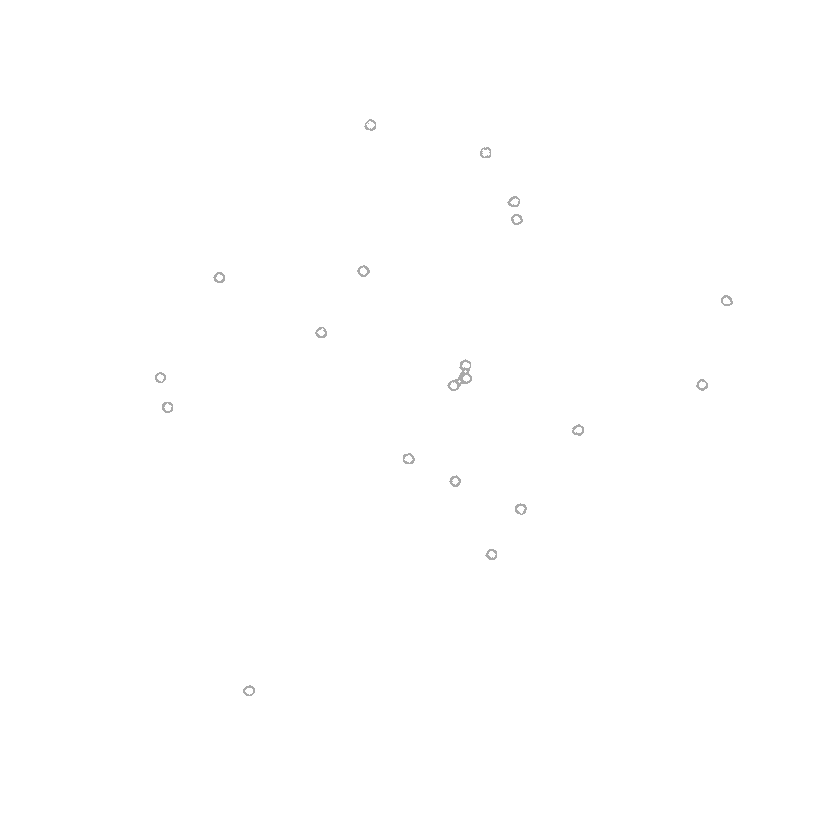

In [196]:
network <- graph_from_adjacency_matrix(Famed_common_singers, "undirected")

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label=NA,
     # edge
     edge.curved=.3, edge.width = 5, layout=layout.fruchterman.reingold)

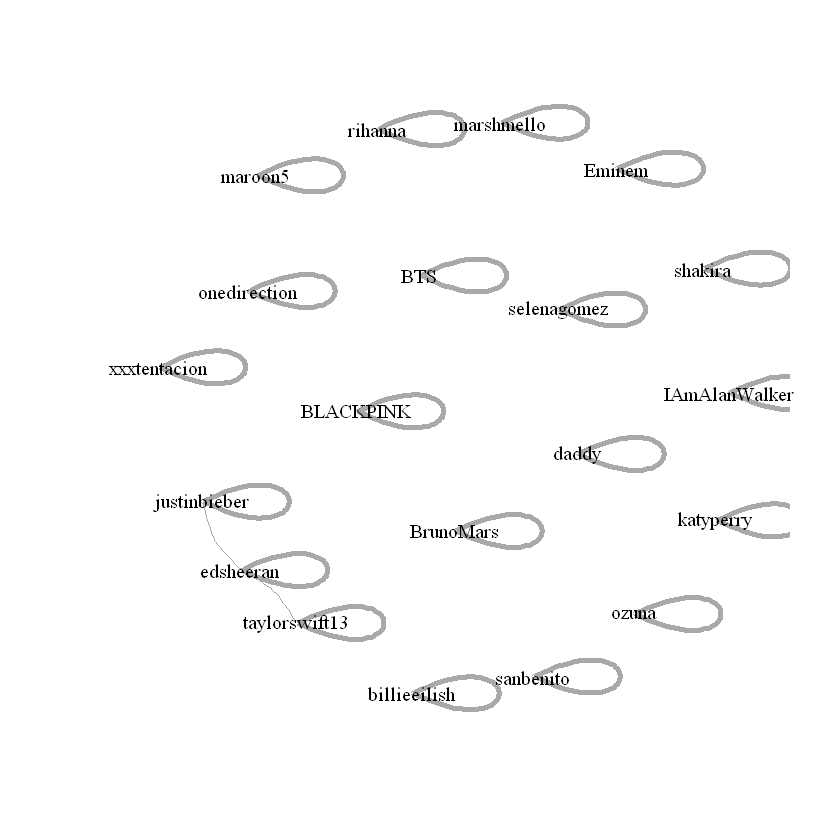

In [49]:
network <- graph_from_adjacency_matrix(Famed_common_follower1, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3,
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), layout=layout.fruchterman.reingold)

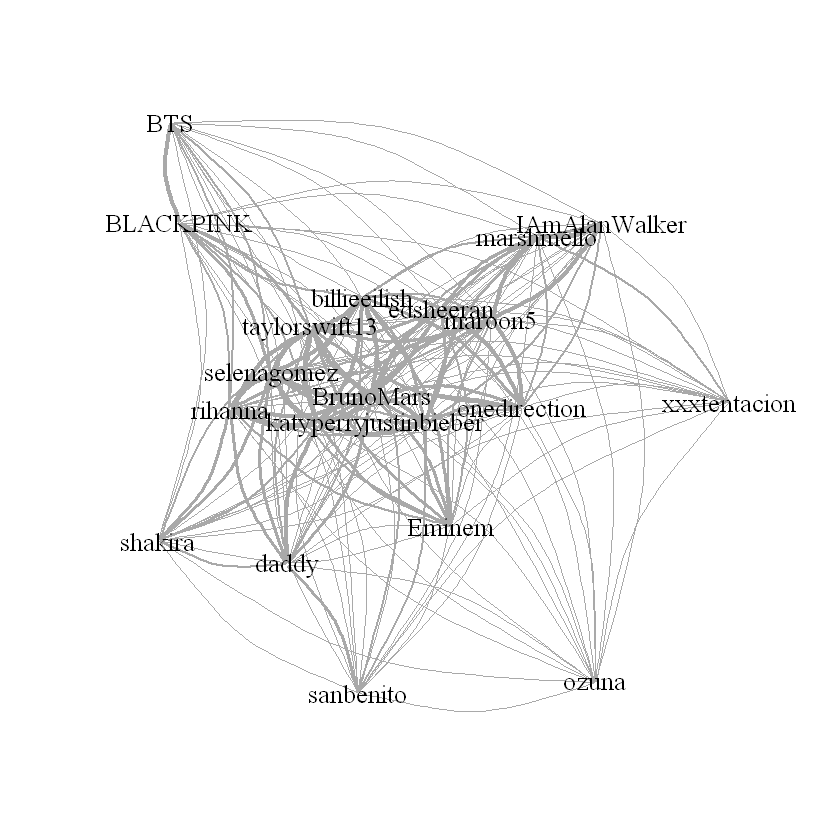

In [150]:
network <- graph_from_adjacency_matrix(Famed_common_follower1/319*100, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3,
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), layout=layout.fruchterman.reingold)

In [57]:
# A 'for loop' that read CSVs from specific folder and randomly sample 10000 rows for each file
# Returns a list of sampled dataframes

sampled_famed<- lapply(famed, function(x) {
    
    df <- read.csv(x, row.names = 1, header = TRUE) # load file
    
    name = x %>% substring(23,) %>% strsplit('_')
    
    artist_name = rep(name[[1]][1], each = 50000)
    
    if (length(nrow(df)) == 50000) {
    df$artist_name <- artist_name
    DATASET <- df
    } else if (length(nrow(df) > 50000)) {  
    DATASET <- data.frame(artist_name, df[sample(nrow(df), 50000, replace = FALSE), ], stringsAsFactors = TRUE)
    }
    
    return(DATASET)
})

In [63]:
edge_list <- function(df_list){
    df <- bind_rows(df_list)
    names(df)[2] <- 'user_id'
    return(df)
}

In [60]:
common_follower_matrix <- function(edge_list){
    
    # long to wide
    matrix <- edge_list %>%
    mutate(yesno = 1) %>%
    distinct %>%
    spread(artist_name, yesno, fill = 0)
    
    # rename
    rownames(matrix) <- matrix$user_id
    matrix <- matrix[-c(1)]
    
    # convert to matrix
    matrix <- as.matrix(matrix)
    matrix_T <- t(matrix)
    
    common_matrix <- matrix_T %*% matrix
    
    return(common_matrix)
}

In [64]:
famed_df <- edge_list(sampled_famed)

In [199]:
famed_common_follower <- common_follower_matrix(famed_df)

In [120]:
diag(famed_common_follower) <- 0
# famed_common_follower[famed_common_follower >= 49999] <- 0

In [121]:
max(famed_common_follower)

[1] 8597

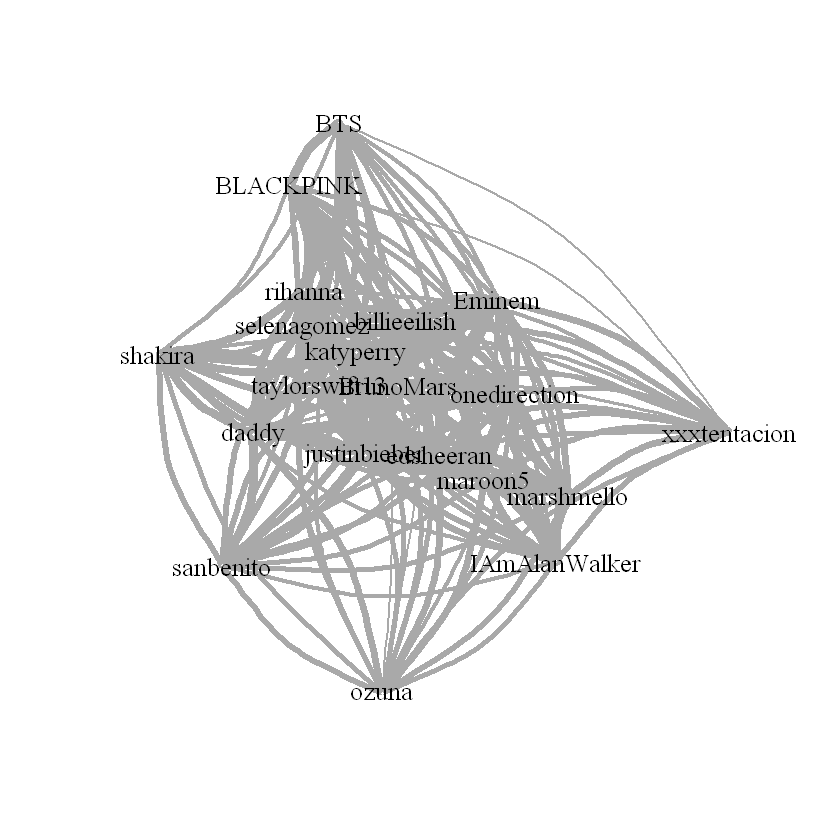

In [47]:
network <- graph_from_adjacency_matrix(famed_common_follower, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3,
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), layout=layout.fruchterman.reingold)

In [202]:
mat <- cor(famed_common_follower)

In [204]:
mat

,billieeilish,BLACKPINK,BrunoMars,BTS,daddy,edsheeran,Eminem,IAmAlanWalker,justinbieber,katyperry,maroon5,marshmello,onedirection,ozuna,rihanna,sanbenito,selenagomez,shakira,taylorswift13,xxxtentacion
billieeilish,1.000000000,-0.06069638,0.011441335,-0.07206337,-0.065014182,-0.04146152,-0.04401661,-0.08045730,-0.01750797,0.033754741,-0.06434961,-0.07580005,-0.05620014,-0.07830114,-0.01882028,-0.068723551,0.003183032,-0.07408062,0.053358314,-0.07364129
BLACKPINK,-0.060696384,1.00000000,-0.083412108,0.10172625,-0.072091793,-0.08163462,-0.07162074,-0.07573833,-0.06771984,-0.079120530,-0.08285146,-0.07911136,-0.07168316,-0.06561445,-0.07115407,-0.066727390,-0.054151569,-0.06852393,-0.047152818,-0.06573716
BrunoMars,0.011441335,-0.08341211,1.000000000,-0.08943915,-0.036450255,0.01765777,-0.02600507,-0.09340429,0.02285801,0.174542254,0.01094110,-0.08482173,-0.05622251,-0.08839098,0.01213127,-0.082209400,0.033039163,-0.07625922,0.007913002,-0.08803547
BTS,-0.072063366,0.10172625,-0.089439148,1.00000000,-0.069124001,-0.08258938,-0.07170752,-0.07512060,-0.07359982,-0.088600453,-0.08308051,-0.07838147,-0.07226420,-0.06367329,-0.06469363,-0.064753295,-0.063062311,-0.06602611,-0.069516888,-0.06385599
daddy,-0.065014182,-0.07209179,-0.036450255,-0.06912400,1.000000000,-0.07339371,-0.06559137,-0.08110966,-0.07131066,-0.003294313,-0.07840191,-0.08343909,-0.07685031,-0.05454494,-0.02741052,-0.006089921,-0.022259081,-0.04187558,-0.063046388,-0.06917246
edsheeran,-0.041461524,-0.08163462,0.017657773,-0.08258938,-0.073393710,1.00000000,-0.05438412,-0.04921497,-0.02592900,-0.046657382,0.08623007,-0.03127983,0.01599413,-0.06603314,-0.08234883,-0.076628999,-0.078047590,-0.07568112,-0.053035778,-0.07135243
Eminem,-0.044016614,-0.07162074,-0.026005074,-0.07170752,-0.065591374,-0.05438412,1.00000000,-0.07266931,-0.04352018,-0.039652873,-0.06179926,-0.06923479,-0.06619315,-0.06532293,-0.06422074,-0.063559922,-0.075168645,-0.06495572,-0.048335077,-0.04933670
IAmAlanWalker,-0.080457295,-0.07573833,-0.093404294,-0.07512060,-0.081109661,-0.04921497,-0.07266931,1.00000000,-0.06573539,-0.108519632,0.00302304,0.22767028,-0.06186606,-0.06359052,-0.10144286,-0.070737781,-0.108061418,-0.07226693,-0.098039587,-0.05874764
justinbieber,-0.017507966,-0.06771984,0.022858009,-0.07359982,-0.071310663,-0.02592900,-0.04352018,-0.06573539,1.00000000,-0.008054370,-0.03276587,-0.06260074,-0.02230408,-0.07318744,-0.05952085,-0.066922700,-0.038821529,-0.07318095,-0.012826691,-0.07054856
katyperry,0.033754741,-0.07912053,0.174542254,-0.08860045,-0.003294313,-0.04665738,-0.03965287,-0.10851963,-0.00805437,1.000000000,-0.06245483,-0.10597155,-0.08281678,-0.09592998,0.13333112,-0.089160566,0.182438121,-0.06765866,0.098317377,-0.09711112


In [205]:
diag(mat) <- 0

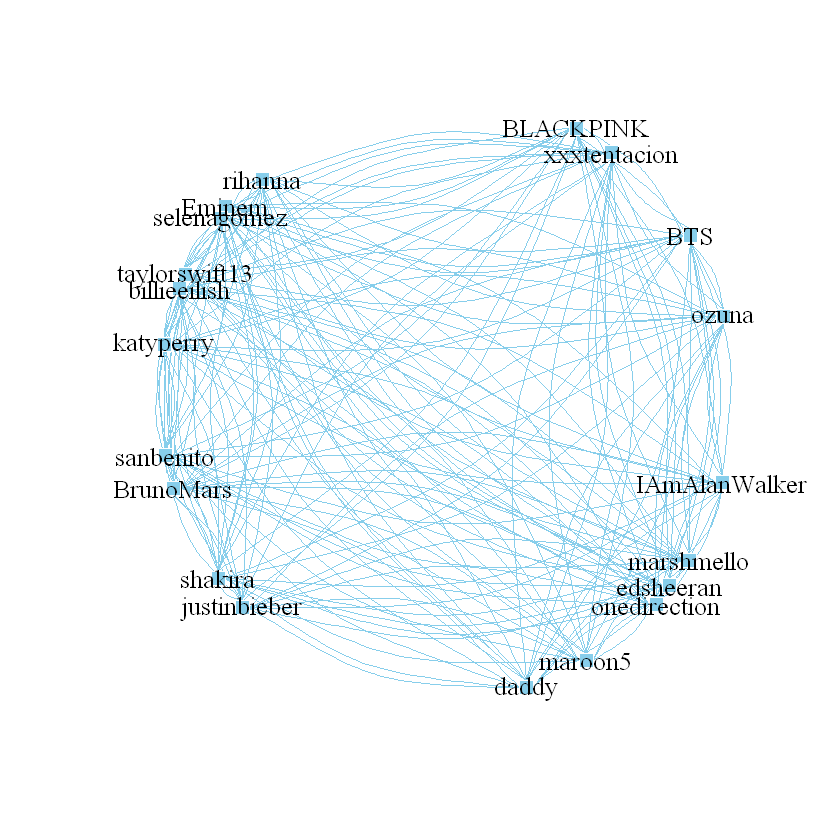

In [210]:
network <- graph_from_adjacency_matrix(mat, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'skyblue', vertex.frame.color = 'white', vertex.size = 5,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3, vertex.shape = 'csquare',
     # edge
     edge.curved=.3, edge.width = E(network)$weight, 
     #layout=layout.circle, 
     #layout=layout.sphere,
     # layout=layout.fruchterman.reingold,
     edge.color = 'skyblue')

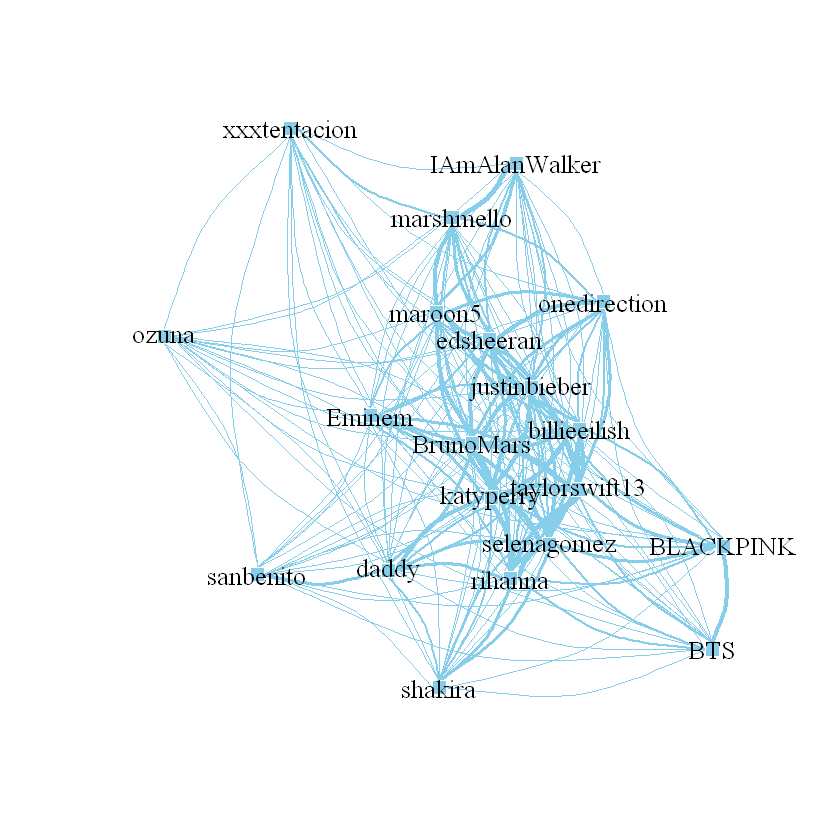

In [130]:
network <- graph_from_adjacency_matrix(famed_common_follower/8597*100, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'skyblue', vertex.frame.color = 'white', vertex.size = 5,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3, vertex.shape = 'csquare',
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), 
     #layout=layout.circle, 
     #layout=layout.sphere,
     layout=layout.fruchterman.reingold,
     edge.color = 'skyblue')

In [131]:
sampled_underrated <- lapply(underrated, function(x) {
    
    df <- read.csv(x, row.names = 1, header = TRUE) # load file
    
    name = x %>% substring(27,) %>% strsplit('_')
    
    artist_name = rep(name[[1]][1], each = 50000)
    
    if (length(nrow(df)) == 50000) {
    df$artist_name <- artist_name
    DATASET <- df
    } else if (length(nrow(df) > 50000)) {  
    DATASET <- data.frame(artist_name, df[sample(nrow(df), 50000, replace = FALSE), ], stringsAsFactors = TRUE)
    }
    
    return(DATASET)
})

In [132]:
underrate_df <- edge_list(sampled_underrated)

In [133]:
underrate_df %>% head(5)

,artist_name,user_id
,<fct>,<dbl>
1,alinabaraz,1.488474e+18
2,alinabaraz,1.287059e+18
3,alinabaraz,9.160867e+08
4,alinabaraz,4.329357e+08
5,alinabaraz,2.883925e+09


In [134]:
underrate_common_follower <- common_follower_matrix(underrate_df)

In [135]:
diag(underrate_common_follower) <- 0
# underrate_common_follower[underrate_common_follower >= 30000] <- 0

In [136]:
max(underrate_common_follower)

[1] 3330

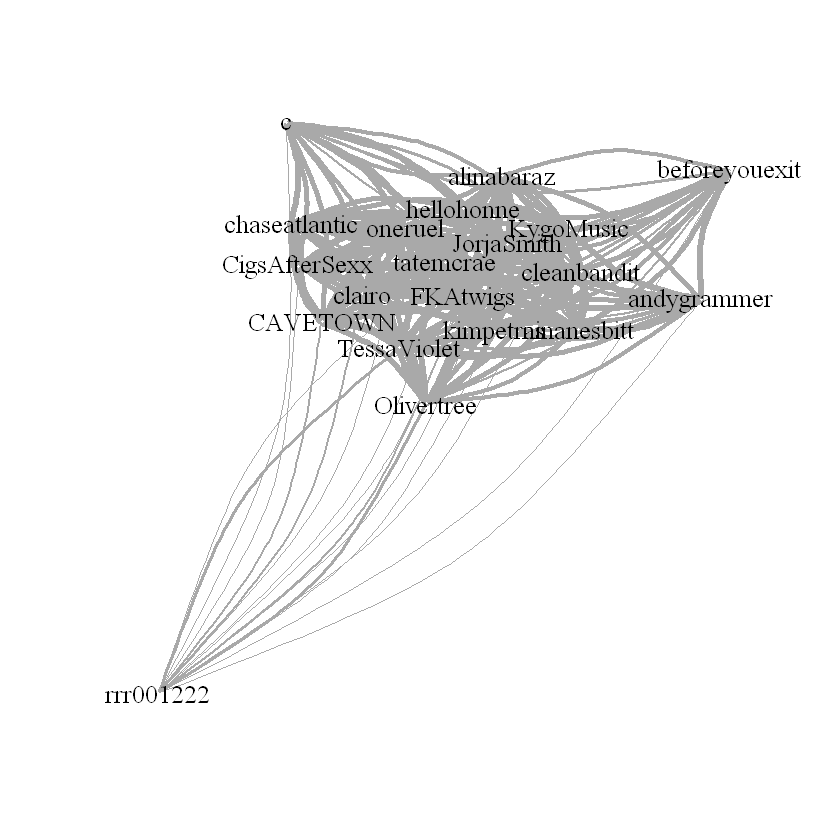

In [82]:
network <- graph_from_adjacency_matrix(underrate_common_follower, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3,
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), layout=layout.fruchterman.reingold)

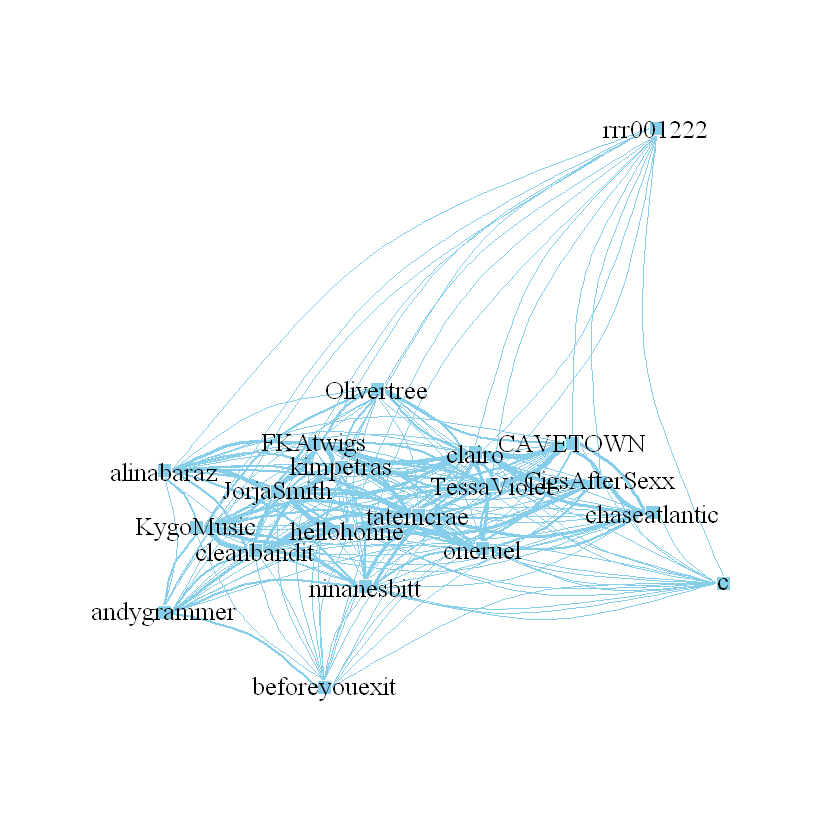

In [157]:
network <- graph_from_adjacency_matrix(underrate_common_follower/3330*100, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'skyblue', vertex.frame.color = 'white', vertex.size = 5,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3, vertex.shape = 'csquare',
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), 
     #layout=layout.circle, 
     #layout=layout.sphere,
     layout=layout.fruchterman.reingold,
     edge.color = 'skyblue')

In [141]:
underrate_df %>% glimpse()
famed_df %>% glimpse()

Rows: 1,000,000
Columns: 2
$ artist_name <fct> alinabaraz, alinabaraz, alinabaraz, alinabaraz, alinabaraz~
$ user_id     <dbl> 1.488474e+18, 1.287059e+18, 9.160867e+08, 4.329357e+08, 2.~
Rows: 1,000,000
Columns: 2
$ artist_name <fct> billieeilish, billieeilish, billieeilish, billieeilish, bi~
$ user_id     <dbl> 2.478668e+08, 1.519257e+18, 1.268405e+18, 1.305071e+18, 1.~


In [158]:
all_df <- bind_rows(underrate_df, famed_df)

In [92]:
all_df %>% glimpse()

Rows: 2,000,000
Columns: 2
$ artist_name <fct> alinabaraz, alinabaraz, alinabaraz, alinabaraz, alinabaraz~
$ follower_id <dbl> 8.994209e+17, 4.927556e+08, 2.315195e+08, 7.186784e+17, 3.~


In [159]:
common_follower <- common_follower_matrix(all_df)

In [161]:
diag(common_follower) <- 0
#common_follower[common_follower >= 30000] <- 0

In [95]:
max(common_follower)

[1] 8602

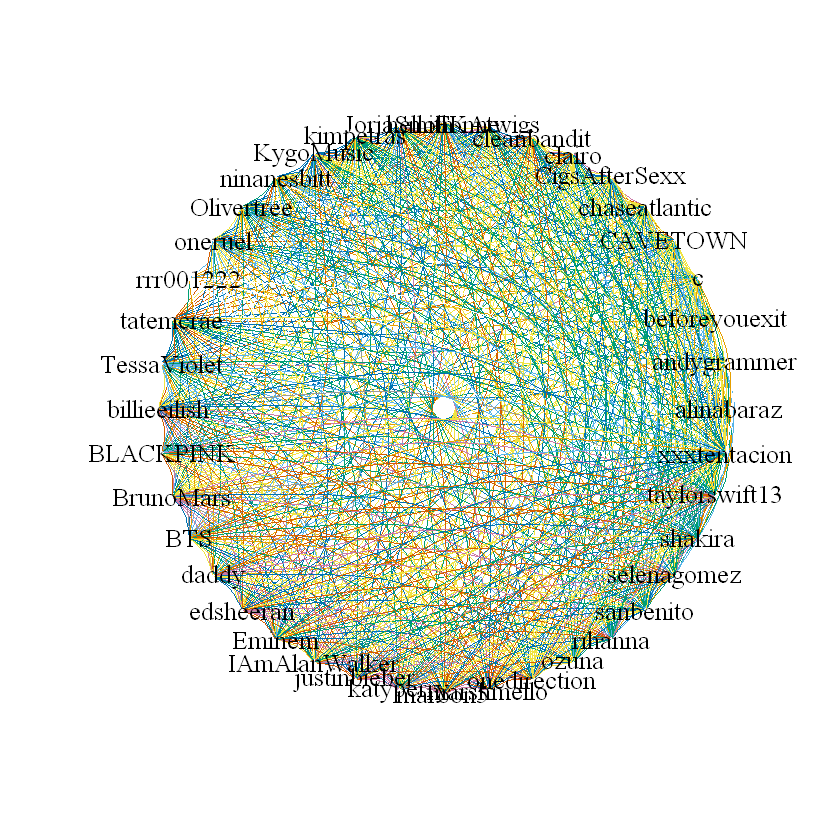

In [101]:
network <- graph_from_adjacency_matrix(common_follower, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'white', vertex.frame.color = 'white', vertex.size = 1,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3,
     # edge
     edge.curved=.3, edge.width = 1, layout=layout.circle, edge.color = log(E(network)$weight) )

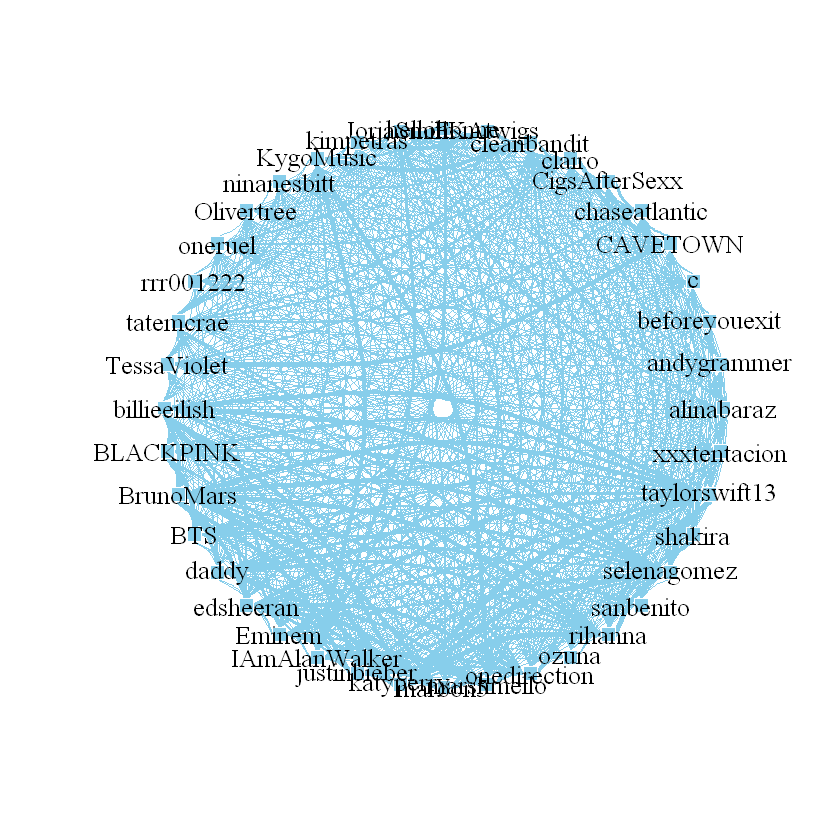

In [171]:
network <- graph_from_adjacency_matrix(common_follower/8602*100, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'skyblue', vertex.frame.color = 'white', vertex.size = 5,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3, vertex.shape = 'csquare',
     # edge
     edge.curved=.3, edge.width =  log(E(network)$weight), 
     layout=layout.circle, 
     #layout=layout.sphere,
     #layout=layout.fruchterman.reingold,
     edge.color = 'skyblue')

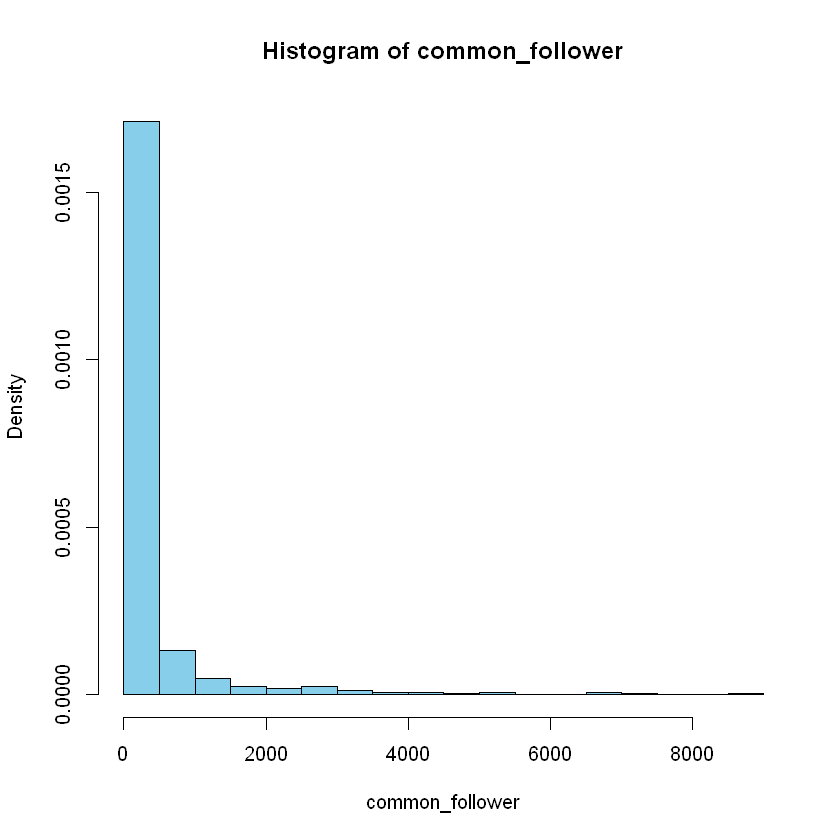

In [186]:
hist(common_follower, freq=FALSE, col = 'skyblue', breaks=16)

In [187]:
scaled_common_follower <- common_follower
scaled_common_follower[scaled_common_follower <= 500] <- 0
# scaled_common_follower[scaled_common_follower > 1 & scaled_common_follower <= 2000] <- 2
# scaled_common_follower[scaled_common_follower > 2 & scaled_common_follower <= 3000] <- 3
# scaled_common_follower[scaled_common_follower > 3 & scaled_common_follower <= 4000] <- 4
# scaled_common_follower[scaled_common_follower > 4 & scaled_common_follower <= 5000] <- 5
# scaled_common_follower[scaled_common_follower > 5 & scaled_common_follower <= 6000] <- 6
# scaled_common_follower[scaled_common_follower > 6 & scaled_common_follower <= 7000] <- 7
# scaled_common_follower[scaled_common_follower > 7 & scaled_common_follower <= 9000] <- 8

In [188]:
max(scaled_common_follower)

[1] 8597

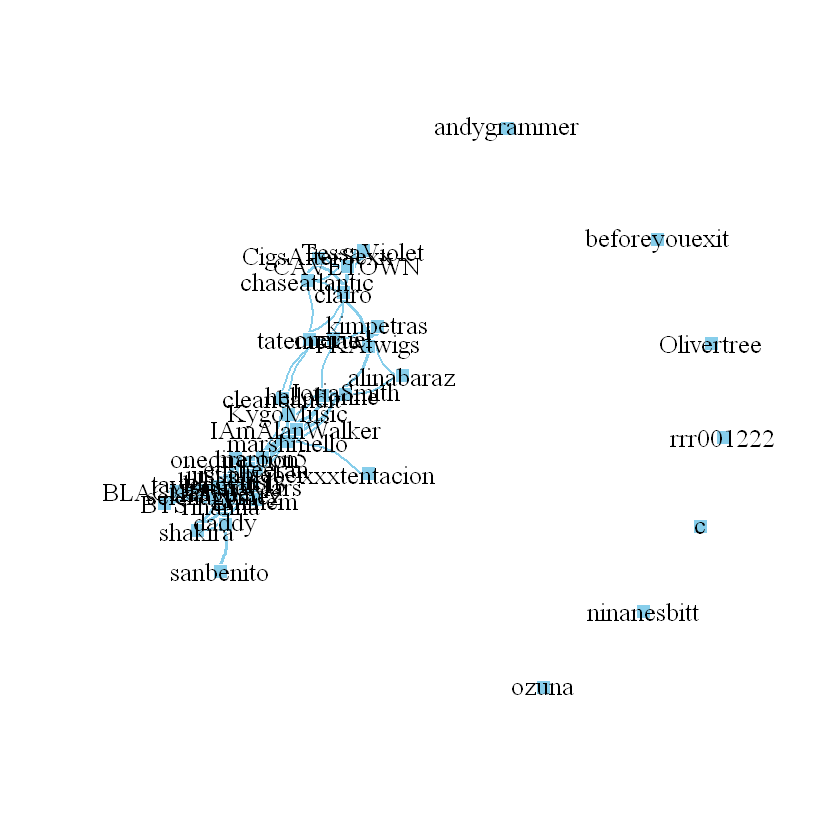

In [212]:
network <- graph_from_adjacency_matrix(scaled_common_follower/8597*100, "undirected", weighted = TRUE)

plot(network,
     # node
     vertex.color = 'skyblue', vertex.frame.color = 'white', vertex.size = 5,
     # lable
     vertex.label.color="black", vertex.label.cex = 1.3, vertex.shape = 'csquare',
     # edge
     edge.curved=.3, edge.width = log(E(network)$weight), 
     #layout=layout.circle, 
     #layout=layout.sphere,
     layout=layout.fruchterman.reingold,
     edge.color = 'skyblue')

In [4]:
youtube_famed <- list.files(path="youtube_data", pattern="*.csv", full.names=TRUE, recursive=FALSE)

In [5]:
youtube_df <- lapply(youtube_famed, function(x) {
    
    df <- read.csv(x, header = TRUE) # load file
    
    name = x %>% substring(14,) %>% strsplit('.csv')
    
    artist_name = rep(name[[1]][1], each = nrow(df))
    
    df$artist_name <- artist_name
    
    DATASET <- df
    return(DATASET)
})

In [6]:
youtube_df <- bind_rows(youtube_df)

In [7]:
youtube_df %>% glimpse()

Rows: 5,495
Columns: 6
$ Video_Title       <chr> "Walkerverse - The Tour (Trailer)", "Walkerverse The~
$ Video_PublishDate <chr> "2022-05-06T14:08:30Z", "2022-05-06T14:00:11Z", "202~
$ Video_Views       <dbl> 206768, 341236, 2572446, 140413, 286643, 128157, 883~
$ Video_Likes       <int> 18705, 36454, 144067, 17054, 23234, 11094, 8680, 173~
$ Video_Comments    <int> 1220, 2510, 7319, 561, 1336, 325, 203, 490, 2156, 32~
$ artist_name       <chr> "Alan Walker", "Alan Walker", "Alan Walker", "Alan W~


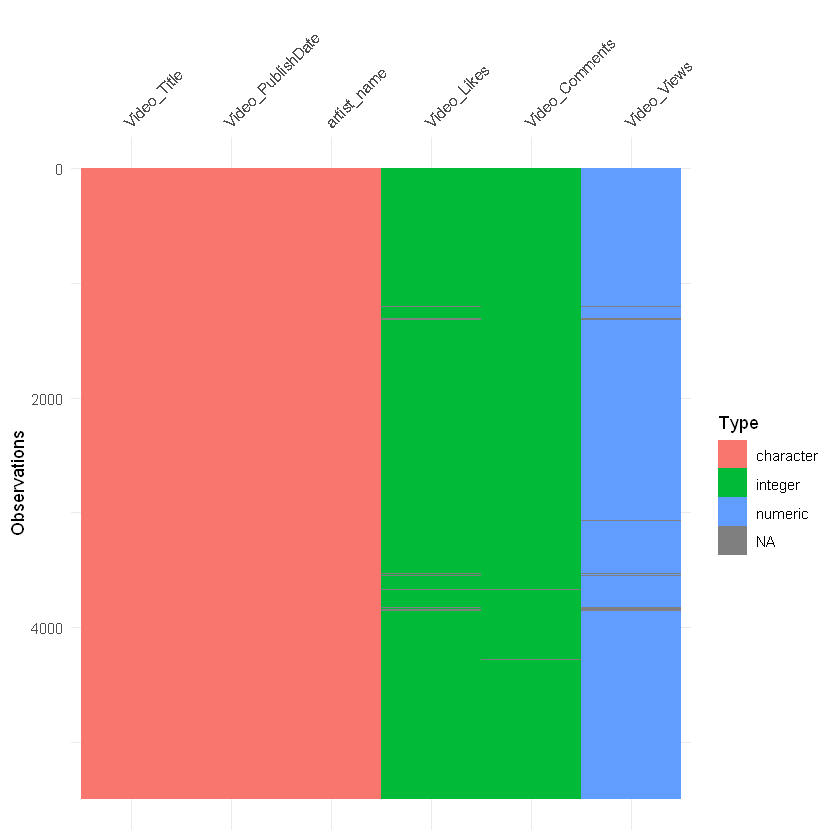

In [8]:
library(visdat)
youtube_df %>% vis_dat()

In [9]:
youtube_df <- youtube_df %>% na.omit()

In [10]:
youtube_df %>% glimpse()

Rows: 5,409
Columns: 6
$ Video_Title       <chr> "Walkerverse - The Tour (Trailer)", "Walkerverse The~
$ Video_PublishDate <chr> "2022-05-06T14:08:30Z", "2022-05-06T14:00:11Z", "202~
$ Video_Views       <dbl> 206768, 341236, 2572446, 140413, 286643, 128157, 883~
$ Video_Likes       <int> 18705, 36454, 144067, 17054, 23234, 11094, 8680, 173~
$ Video_Comments    <int> 1220, 2510, 7319, 561, 1336, 325, 203, 490, 2156, 32~
$ artist_name       <chr> "Alan Walker", "Alan Walker", "Alan Walker", "Alan W~


In [184]:
youtube_df %>% group_by(artist_name) %>% summarise(n())

artist_name,n()
<chr>,<int>
Alan Walker,308
Ariana Grande,143
Bad Bunny,121
BANGTANTV,1683
Billie Eilish,45
BLACKPINK,391
Bruno Mars,97
Daddy Yankee,409
Ed Sheeran,241


In [174]:
youtube_df %>% group_by(artist_name) %>% summarise(average_comments = mean(Video_Comments),
                                                   average_like = mean(Video_Likes),
                                                   average_views = mean(Video_Views) 
                                                  )

artist_name,average_comments,average_like,average_views
<chr>,<dbl>,<dbl>,<dbl>
Alan Walker,16448.6916,384516.24,35185299
Ariana Grande,9572.7692,180876.97,7543426
Bad Bunny,37894.4545,1306596.12,150384289
BANGTANTV,23222.6910,639695.78,7258289
Billie Eilish,28478.8222,684738.42,22925376
BLACKPINK,103577.1790,1335941.58,56659041
Bruno Mars,36136.0206,1018490.66,162149750
Daddy Yankee,7282.2274,197612.18,35280666
Ed Sheeran,21228.8755,723002.49,105362863


In [179]:
Channels_info <- read.csv('Channels_info.csv')

In [180]:
Channels_info %>% head(5)

,Channel_id,Channel_name,Channel_description,Channel_PublishDate,Channel_TotalViews,Channel_VideoCount,Subscribers,Playlist_id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,Help change the world. JUSTICE the album out now https://JustinBieber.lnk.to/Justice,2007-01-15T21:17:27Z,27915519197,245,68800000,UUIwFjwMjI0y7PDBVEO9-bkQ
2,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,"BLACKPINK Official YouTube Channel ë¸”ëž™í•‘í¬ ê³µì‹ ìœ íŠœë¸Œ ì±„ë„ìž…ë‹ˆë‹¤. JISOO, JENNIE, ROSÃ‰, LISA ì§€ìˆ˜, ì œë‹ˆ, ë¡œì œ, ë¦¬ì‚¬",2016-06-29T03:15:23Z,23617083523,394,74100000,UUOmHUn--16B90oW2L6FRR3A
3,UCYvmuw-JtVrTZQ-7Y4kd63Q,Katy Perry,https://www.katyperry.com/,2008-06-01T19:58:36Z,23569430490,113,42800000,UUYvmuw-JtVrTZQ-7Y4kd63Q
4,UCmBA_wu8xGg1OfOkfW13Q0Q,Bad Bunny,"Bienvenid@s al canal oficial de YouTube de Bad Bunny. Â¡Encuentra todos los videos musicales y audios oficiales de Bad Bunny para todos sus Ã¡lbumes, incluyendo El Ãšltimo Tour del Mundo, YHLQMDLG, X 100PRE, Las Que No Iban a Salir y mÃ¡s!",2014-06-09T02:50:42Z,19934216649,121,39500000,UUmBA_wu8xGg1OfOkfW13Q0Q
5,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,ë°©íƒ„ì†Œë…„ë‹¨ ê³µì‹ ìœ íŠœë¸Œ ì±„ë„ ìž…ë‹ˆë‹¤. This is the Official YouTube channel for BTS.,2012-12-17T03:20:38Z,16086618826,1692,66200000,UULkAepWjdylmXSltofFvsYQ


In [57]:
df <- data.frame (Artists  = c('A', 'B', 'C', 'D', 'B', 'D'),
                  Followers = c('a', 'a', 'b', 'c', 'd', 'd')
                  )

In [58]:
df

Artists,Followers
<chr>,<chr>
A,a
B,a
C,b
D,c
B,d
D,d


In [59]:
df <- df %>%
  mutate(yesno = 1) %>%
  distinct %>%
  spread(Artists, yesno, fill = 0)

In [60]:
df

Followers,A,B,C,D
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
a,1,1,0,0
b,0,0,1,0
c,0,0,0,1
d,0,1,0,1


In [66]:
rownames(df) <- df$Followers
df <- df[-c(1)]

In [67]:
df <- as.matrix(df)
df_t <- t(df)

In [68]:
df_common <- df_t %*% df

In [69]:
df_common

,A,B,C,D
A,1,1,0,0
B,1,2,0,1
C,0,0,1,0
D,0,1,0,2
